**Submission Machine Learning Pemula**


---
* Nama : Ali Mustofa 
* Email : hai.alimustofa@gmail.com
* Asal : Ponorogo


# Import library 

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
import os

# Menyiapkan dataset rockpaperscissors

Download dataset zip file


In [ ]:
!wget --no-check-certificate \
https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2020-10-12 09:34:56--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  2.88MB/s    in 52s     

2020-10-12 09:35:49 (5.92 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



Extract file rockpaperscissors

In [ ]:
import zipfile

local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip,'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
os.listdir('/tmp/rockpaperscissors')

['paper', 'README_rpc-cv-images.txt', 'scissors', 'rock', 'rps-cv-images']

Membuat directory train dan validation

In [ ]:
rps_dir = '/tmp/rockpaperscissors'

# train directory
try:
  rps_train_dir = os.path.join(rps_dir, 'train')
  os.mkdir(rps_train_dir)
except FileExistsError as error:
  print(error)

# validation directory
try:
  rps_val_dir = os.path.join(rps_dir, 'val')
  os.mkdir(rps_val_dir)
except FileExistsError as error:
  print(error)

Initialize Directory Rock Paper dan Scissors

In [ ]:
rock_dir = os.path.join(rps_dir,'rock')
paper_dir = os.path.join(rps_dir, 'paper')
scissors_dir = os.path.join(rps_dir, 'scissors')

Membagi dataset train dan validation

In [ ]:
# direktori rock
train_rock_dir, val_rock_dir = train_test_split(os.listdir(rock_dir), test_size = 0.4)

# direktori
train_paper_dir, val_paper_dir = train_test_split(os.listdir(paper_dir), test_size = 0.4)

# direktori scissors
train_scissors_dir, val_scissors_dir = train_test_split(os.listdir(scissors_dir), test_size = 0.4)


## Membuat directory Rock, Paper dan Scissors di dalam directory train dan val





Rock train dan validation


In [ ]:
# Train Rock directory
try:
  train_rock = os.path.join(rps_train_dir, 'rock')
  os.mkdir(train_rock)
except FileExistsError as error:
  print(error)

# Validation Rock directory
try:
  val_rock = os.path.join(rps_val_dir, 'rock')
  os.mkdir(val_rock)
except FileExistsError as error:
  print(error)

Paper train dan validation


In [ ]:
# Train Paper directory
try:
  train_paper = os.path.join(rps_train_dir, 'paper')
  os.mkdir(train_paper)
except FileExistsError as error:
  print(error)

# Validation Paper directory
try:
  val_paper = os.path.join(rps_val_dir, 'paper')
  os.mkdir(val_paper)
except FileExistsError as error:
  print(error)

Scissors train dan validation


In [ ]:
# Train Scissors directory
try:
  train_scissors = os.path.join(rps_train_dir, 'scissors')
  os.mkdir(train_scissors)
except FileExistsError as error:
  print(error)

# Validation Scissors directory
try:
  val_scissors = os.path.join(rps_val_dir, 'scissors')
  os.mkdir(val_scissors)
except FileExistsError as error:
  print(error)

## Copy datasets ke directory train dan val

In [ ]:
from shutil import copy

Copy dataset Rock ke directory train validation

In [ ]:
for img_name in train_rock_dir:
  copy(os.path.join(rock_dir, img_name), os.path.join(train_rock, img_name))

for img_name in val_rock_dir:
  copy(os.path.join(rock_dir, img_name), os.path.join(val_rock, img_name))

print('Jumlah gambar train rock :', len(os.listdir('/tmp/rockpaperscissors/train/rock')))
print('Jumlah gambar validation rock :', len(os.listdir('/tmp/rockpaperscissors/val/rock')))

Jumlah gambar train rock : 435
Jumlah gambar validation rock : 291


Copy dataset Paper ke directory train validation



In [ ]:
for img_name in train_paper_dir:
  copy(os.path.join(paper_dir, img_name), os.path.join(train_paper, img_name))

for img_name in val_paper_dir:
  copy(os.path.join(paper_dir, img_name), os.path.join(val_paper, img_name))

print('Jumlah gambar train paper :', len(os.listdir('/tmp/rockpaperscissors/train/paper')))
print('Jumlah gambar validation paper :', len(os.listdir('/tmp/rockpaperscissors/val/paper')))

Jumlah gambar train paper : 427
Jumlah gambar validation paper : 285


Copy dataset Scissors ke directory train validation

In [ ]:
for img_name in train_scissors_dir:
  copy(os.path.join(scissors_dir, img_name), os.path.join(train_scissors, img_name))

for img_name in val_scissors_dir:
  copy(os.path.join(scissors_dir, img_name), os.path.join(val_scissors, img_name))

print('Jumlah gambar train scissors :', len(os.listdir('/tmp/rockpaperscissors/train/scissors')))
print('Jumlah gambar validation scissors :', len(os.listdir('/tmp/rockpaperscissors/val/scissors')))

Jumlah gambar train scissors : 450
Jumlah gambar validation scissors : 300


# Training dataset

Image data generator

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

Train dan Validation Datagen

In [ ]:
train_generator = train_datagen.flow_from_directory(
    rps_train_dir,
    target_size =(150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

validation_generator = test_datagen.flow_from_directory(
    rps_val_dir,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


model sequential

In [ ]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape= (150,150,3)),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(64,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(128,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Conv2D(256,(3,3), activation= 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation= 'relu'),
  tf.keras.layers.Dense(3, activation= 'softmax')
])

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = tf.optimizers.Adam(),
    metrics=['accuracy'] )

In [ ]:
history = model.fit(
      train_generator,
      steps_per_epoch=30,
      epochs=20,
      validation_data=validation_generator,
      validation_steps=5,
      verbose=2)

Epoch 1/20
30/30 - 9s - loss: 1.1291 - accuracy: 0.3604 - val_loss: 1.0738 - val_accuracy: 0.4437
Epoch 2/20
30/30 - 9s - loss: 0.8995 - accuracy: 0.5844 - val_loss: 0.5689 - val_accuracy: 0.7563
Epoch 3/20
30/30 - 9s - loss: 0.4416 - accuracy: 0.8469 - val_loss: 0.3188 - val_accuracy: 0.8938
Epoch 4/20
30/30 - 9s - loss: 0.2565 - accuracy: 0.9208 - val_loss: 0.2032 - val_accuracy: 0.9375
Epoch 5/20
30/30 - 9s - loss: 0.2089 - accuracy: 0.9292 - val_loss: 0.1797 - val_accuracy: 0.9312
Epoch 6/20
30/30 - 9s - loss: 0.1696 - accuracy: 0.9490 - val_loss: 0.1925 - val_accuracy: 0.9187
Epoch 7/20
30/30 - 9s - loss: 0.1958 - accuracy: 0.9427 - val_loss: 0.1916 - val_accuracy: 0.9375
Epoch 8/20
30/30 - 9s - loss: 0.1267 - accuracy: 0.9656 - val_loss: 0.1555 - val_accuracy: 0.9438
Epoch 9/20
30/30 - 9s - loss: 0.1196 - accuracy: 0.9667 - val_loss: 0.1424 - val_accuracy: 0.9375
Epoch 10/20
30/30 - 9s - loss: 0.1503 - accuracy: 0.9521 - val_loss: 0.2099 - val_accuracy: 0.9312
Epoch 11/20
30/30 -

Menampilkan diagram history


 AVG training accuracy : 0.91 
 AVG training loss : 0.22
 AVG validation accuracy : 0.92 
 AVG validation loss : 0.21


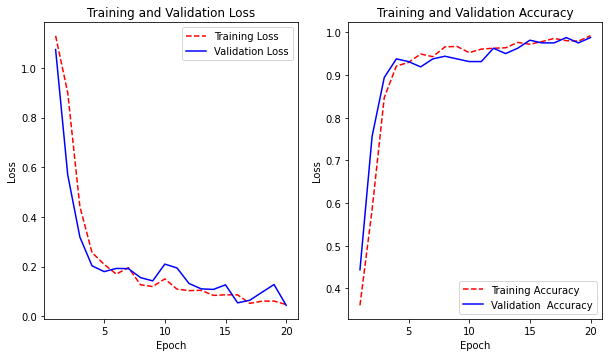

In [ ]:
import matplotlib.pyplot as plt

# initialize loss, accuracy, val_loss, val_accuracy
training_loss = history.history['loss']
training_acc = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_acc = history.history['val_accuracy']

#  Rata-rata 
avg_training_acc = round((sum(training_acc) / len(training_acc)), 2)
avg_training_loss = round((sum(training_loss) / len(training_loss)), 2)
avg_validation_acc = round((sum(validation_acc) / len(validation_acc)), 2)
avg_validation_loss = round((sum(validation_loss) / len(validation_loss)), 2)

print(' AVG training accuracy : {0} \n AVG training loss : {1}'
  .format(avg_training_acc, avg_training_loss))
print(' AVG validation accuracy : {0} \n AVG validation loss : {1}'
  .format(avg_validation_acc, avg_validation_loss))

# Jumlah epoch
epoch_count = range(1, len(training_loss) + 1)

# Visualisasi data
plt.figure(figsize=(10, 12))
plt.subplot(2, 2, 1)
plt.plot(epoch_count, training_loss, 'r--')
plt.plot(epoch_count, validation_loss, 'b-')
plt.legend(['Training Loss', 'Validation Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

plt.subplot(2, 2, 2)
plt.plot(epoch_count, training_acc, 'r--')
plt.plot(epoch_count, validation_acc, 'b-')
plt.legend(['Training Accuracy', 'Validation  Accuracy'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy')
plt.show();

Save model

In [ ]:
model_name = 'rock_paper_scissors_cnn.h5'
model.save(model_name, save_format='h5')

# Prediksi gambar berdasarkan hasil training

In [ ]:
!mkdir uploads

In [ ]:
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

# Definisikan label
labels = ['paper', 'rock', 'scissors']

Saving BmVM7T7MvIkewekj.png to BmVM7T7MvIkewekj.png
/content/uploads/BmVM7T7MvIkewekj.png
Image Name :  BmVM7T7MvIkewekj.png
Prediction :  scissors


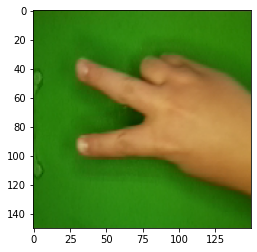

In [ ]:
uploaded = files.upload()
uploaded_files = list(uploaded.keys())


for uploaded_file in uploaded_files:
  !mv $uploaded_file uploads/$uploaded_file

  path_images = '/content/uploads/'
  print(path_images+uploaded_file)
  images = image.load_img(path_images+uploaded_file, target_size =(150,150))
  imgplot = plt.imshow(images)
  x = image.img_to_array(images)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)

  print('Image Name : ', uploaded_file)
  print('Prediction : ', labels[np.argmax(classes)])